In [2]:
import random
import shutil
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt


import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.transforms as T
import torchvision.datasets as datasets
from torchvision.io import read_image


from pathlib import Path
from PIL import Image
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

torch.manual_seed(42)

### Image Visualization for Train/Test/Val

C:\Users\H_JOLLY\AppData\Local\Temp\ipykernel_7260\4179073931.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


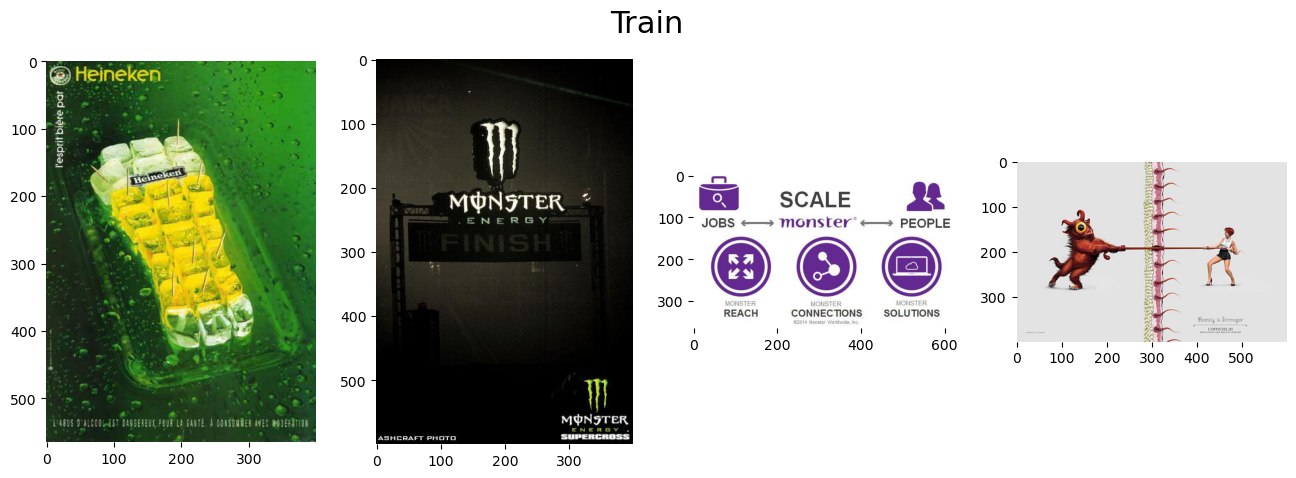

In [3]:
train = "C:\\Users\\H_JOLLY\\Downloads\\images\\train\\"
img_path_train = os.listdir(train)

fig = plt.figure(figsize=(16,5))
fig.suptitle("Train", size=22)

for i,image in enumerate(img_path_train[:4]):
    img = read_image(train + image)
    img = T.ToPILImage()(img)
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
fig.show()

C:\Users\H_JOLLY\AppData\Local\Temp\ipykernel_7260\3430326268.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


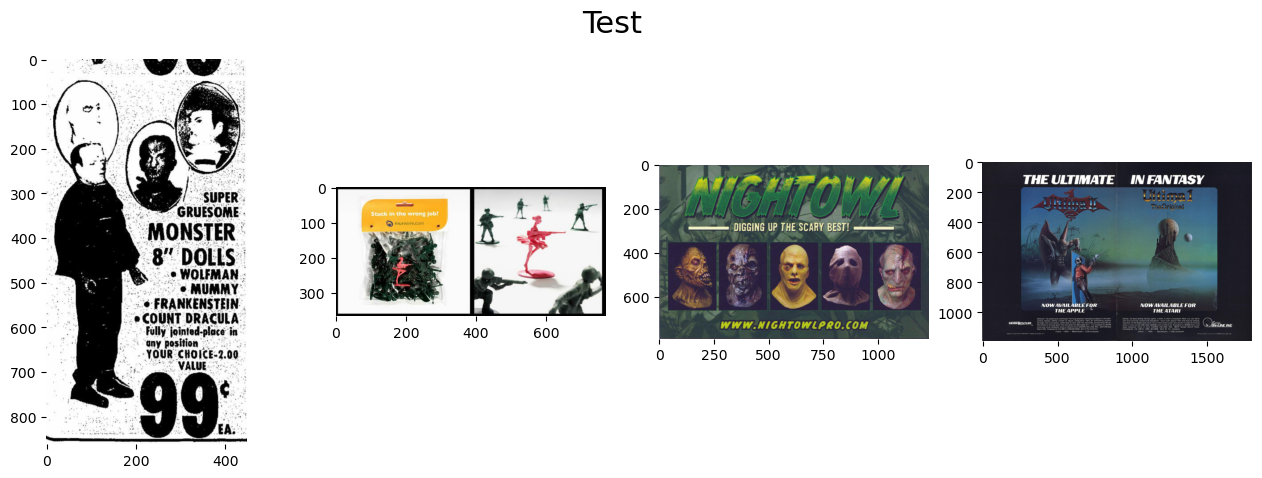

In [4]:
test = "C:\\Users\\H_JOLLY\\Downloads\\images\\test\\"
img_path_test = os.listdir(test)

fig = plt.figure(figsize=(16,5))
fig.suptitle("Test", size=22)

for i,image in enumerate(img_path_test[:4]):
    img = read_image(test + image)
    img = T.ToPILImage()(img)
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
fig.show()

C:\Users\H_JOLLY\AppData\Local\Temp\ipykernel_7260\972320697.py:12: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


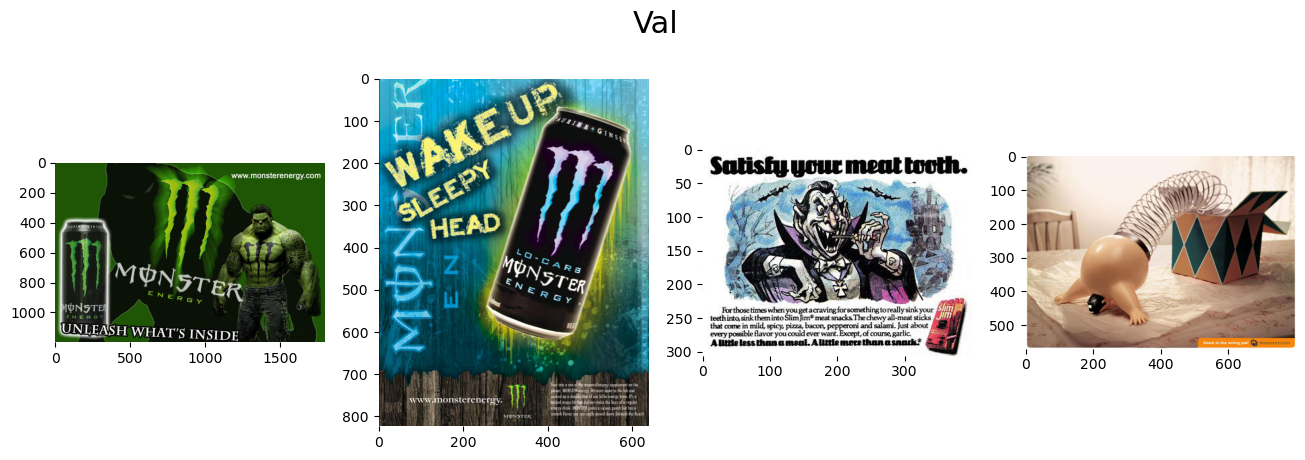

In [5]:
val = "C:\\Users\\H_JOLLY\\Downloads\\images\\val\\"
img_path_val = os.listdir(val)

fig = plt.figure(figsize=(16,5))
fig.suptitle("Val", size=22)

for i,image in enumerate(img_path_val[:4]):
    img = read_image(val + image)
    img = T.ToPILImage()(img)
    plt.subplot(1,4, i+1, frameon=False)
    plt.imshow(img, cmap='gray')
fig.show()

### Visualization of Images (one by one)

In [6]:
img1_path = "C:\\Users\\H_JOLLY\\Downloads\\images\\train\\100850.jpg"
img2_path = "C:\\Users\\H_JOLLY\\Downloads\\images\\train\\56530.jpg"
img3_path = "C:\\Users\\H_JOLLY\\Downloads\\images\\train\\177748.png"
img4_path = "C:\\Users\\H_JOLLY\\Downloads\\images\\train\\177854.png"
img5_path = "C:\\Users\\H_JOLLY\\Downloads\\images\\train\\7550.jpg"

In [7]:
def apply_transform(type, image_path):
    img_visual = Image.open(image_path)
    if type == "hue":
        im = T.functional.adjust_hue(img_visual, 0.1)
    elif type == "gamma":
        im = T.functional.adjust_gamma(img_visual, 0.5, 1 )
    elif type == "brightness":
        im = T.functional.adjust_brightness(img_visual, 1)
    elif type == "contrast":
        im = T.functional.adjust_contrast(img_visual, 1.5)
    elif type == "sharpness":
        im = T.functional.adjust_sharpness(img_visual, 2)
    else:
        im = T.functional.solarize(img_visual, 50)
    return im

In [8]:
im1 = Image.open(img1_path)
im2 = apply_transform(type ="hue", image_path = img1_path)
im3 = apply_transform(type ="gamma", image_path = img1_path)
im4 = apply_transform(type ="brightness", image_path = img1_path)
im5 = apply_transform(type ="contrast", image_path = img1_path)
im6 = apply_transform(type ="sharpness", image_path = img1_path)

im7 = Image.open(img2_path)
im8 = apply_transform(type ="hue", image_path = img2_path)
im9 = apply_transform(type ="gamma", image_path = img2_path)
im10 = apply_transform(type ="brightness", image_path = img2_path)
im11 = apply_transform(type ="contrast", image_path = img2_path)
im12 = apply_transform(type ="sharpness", image_path = img2_path)

# im13 = Image.open(img3_path)
# im14 = apply_transform(type ="hue", image_path = img3_path)
# im15 = apply_transform(type ="gamma", image_path = img3_path)
# im16 = apply_transform(type ="brightness", image_path = img3_path)
# im17 = apply_transform(type ="contrast", image_path = img3_path)
# im18 = apply_transform(type ="sharpness", image_path = img3_path)

# im19 = Image.open(img4_path)
# im20 = apply_transform(type ="hue", image_path = img4_path)
# im21 = apply_transform(type ="gamma", image_path = img4_path)
# im22 = apply_transform(type ="brightness", image_path = img4_path)
# im23 = apply_transform(type ="contrast", image_path = img4_path)
# im24 = apply_transform(type ="sharpness", image_path = img4_path)

# im25 = Image.open(img5_path)
# im26 = apply_transform(type ="hue", image_path = img5_path)
# im27 = apply_transform(type ="gamma", image_path = img5_path)
# im28 = apply_transform(type ="brightness", image_path = img5_path)
# im29 = apply_transform(type ="contrast", image_path = img5_path)
# im30 = apply_transform(type ="sharpness", image_path = img5_path)

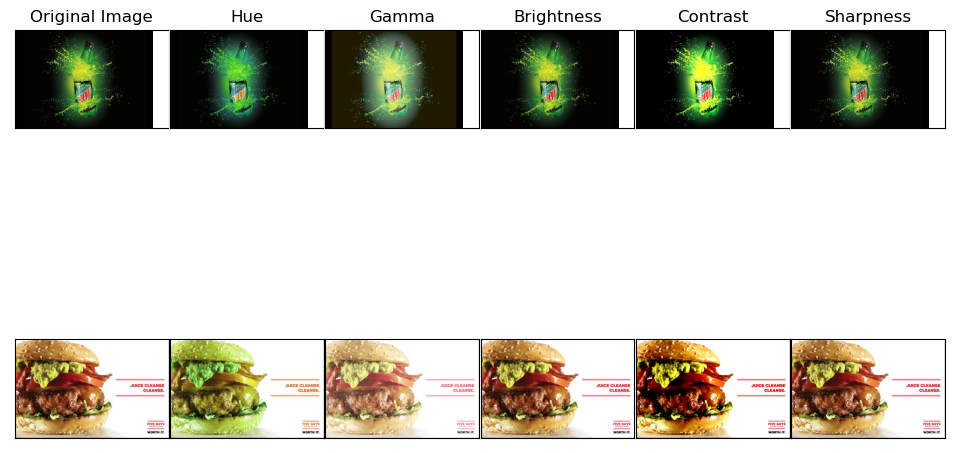

In [9]:
fig = plt.figure(figsize=(12, 8))
gs = fig.add_gridspec(2, 6, hspace=0.01, wspace=0.01)
(ax1,ax2,ax3,ax4,ax5,ax6), (ax7, ax8, ax9, ax10, ax11, ax12) = gs.subplots(sharey='row', sharex='col')

ax1.title.set_text('Original Image')
ax2.title.set_text('Hue')
ax3.title.set_text('Gamma')
ax4.title.set_text('Brightness')
ax5.title.set_text('Contrast')
ax6.title.set_text('Sharpness')

ax1.imshow(im1)
ax2.imshow(im2)
ax3.imshow(im3)
ax4.imshow(im4)
ax5.imshow(im5)
ax6.imshow(im6)
ax7.imshow(im7)
ax8.imshow(im8)
ax9.imshow(im9) 
ax10.imshow(im10) 
ax11.imshow(im11) 
ax12.imshow(im12) 


ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_yticklabels([])
ax1.set_xticklabels([])

ax7.set_xticks([])
ax7.set_yticks([])
ax7.set_yticklabels([])
ax7.set_xticklabels([])

ax8.set_xticks([])
ax8.set_yticks([])
ax8.set_yticklabels([])
ax8.set_xticklabels([])

ax9.set_xticks([])
ax9.set_yticks([])
ax9.set_yticklabels([])
ax9.set_xticklabels([])

ax10.set_xticks([])
ax10.set_yticks([])
ax10.set_yticklabels([])
ax10.set_xticklabels([])

ax11.set_xticks([])
ax11.set_yticks([])
ax11.set_yticklabels([])
ax11.set_xticklabels([])

ax12.set_xticks([])
ax12.set_yticks([])
ax12.set_yticklabels([])
ax12.set_xticklabels([])

ax1.patch.set_edgecolor('white')  
ax1.patch.set_linewidth(0)

ax2.patch.set_edgecolor('white')  
ax2.patch.set_linewidth(2)

ax3.patch.set_edgecolor('white')  
ax3.patch.set_linewidth(2)

ax4.patch.set_edgecolor('white')  
ax4.patch.set_linewidth(2)

ax5.patch.set_edgecolor('white')  
ax5.patch.set_linewidth(2)

ax6.patch.set_edgecolor('white')  
ax6.patch.set_linewidth(2)

ax7.patch.set_edgecolor('white')  
ax7.patch.set_linewidth(0)

# ax8.patch.set_edgecolor('white')  
# ax8.patch.set_linewidth(1)

# ax9.patch.set_edgecolor('white')  
# ax9.patch.set_linewidth(1)

# ax10.patch.set_edgecolor('white')  
# ax10.patch.set_linewidth(1)

# ax11.patch.set_edgecolor('white')  
# ax11.patch.set_linewidth(1)

# ax12.patch.set_edgecolor('white')  
# ax12.patch.set_linewidth(1)

# fig.savefig("image-proc.eps", format="eps", dpi=1200, bbox_inches="tight", transparent=True)

### Visualization of Images (Loops)

In [10]:
images_path = ["C:\\Users\\H_JOLLY\\Downloads\\images\\train\\100850.jpg", "C:\\Users\\H_JOLLY\\Downloads\\images\\train\\56530.jpg", 
               "C:\\Users\\H_JOLLY\\Downloads\\images\\train\\177748.png", "C:\\Users\\H_JOLLY\\Downloads\\images\\train\\177854.png",
               "C:\\Users\\H_JOLLY\\Downloads\\images\\train\\7550.jpg"
              ]

##### Resizing

(600, 424)
(250, 250)


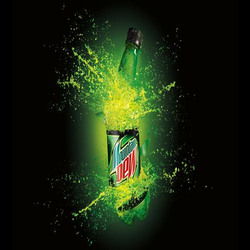

In [11]:
def resize_image(image_path):
    img = Image.open(image_path)
    print(img.size)
    width, height = img.size
    img = img.resize((250, 250), Image.LANCZOS)
    print(img.size)
    return img

resize_image(images_path[0])

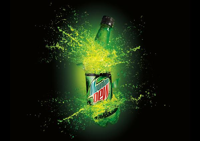

In [12]:
def proportionate_resize(image_path, width_size):
    img = Image.open(image_path)
    # print(img.size)
    basewidth = width_size
    wpercent = (basewidth/float(img.size[0]))
    hsize = int((float(img.size[1])*float(wpercent)))
    img = img.resize((basewidth,hsize))
    # print(img.size)
    return img

proportionate_resize(images_path[0], width_size=200)

##### Transforms 

In [13]:
def no_transform(image_path, width_size):
    im = proportionate_resize(image_path, width_size)
    return im

In [14]:
def apply_transform_with_resize(type, image_path, width_size):
    img_visual = proportionate_resize(image_path, width_size)
    if type == "hue":
        im = T.functional.adjust_hue(img_visual, 0.1)
    elif type == "gamma":
        im = T.functional.adjust_gamma(img_visual, 0.5, 1 )
    elif type == "brightness":
        im = T.functional.adjust_brightness(img_visual, 1)
    elif type == "contrast":
        im = T.functional.adjust_contrast(img_visual, 1.5)
    elif type == "sharpness":
        im = T.functional.adjust_sharpness(img_visual, 2)
    else:
        im = T.functional.solarize(img_visual, 50)
    return im

In [15]:
def get_image_matrix(images_path):
    images = []
    for i in range(0, 5):
        for j in range(0, 6):
            if(j == 0):
                im = no_transform(images_path[i], width_size = 200)
                images.append(im)
            if(j == 1):
                im = apply_transform_with_resize(type ="hue", image_path = images_path[i], width_size = 200)
                images.append(im)
            if(j == 2):
                im = apply_transform_with_resize(type ="gamma", image_path = images_path[i], width_size = 200)
                images.append(im)
            if(j == 3):
                im = apply_transform_with_resize(type ="solarize", image_path = images_path[i], width_size = 200)
                images.append(im)
            if(j == 4):
                im = apply_transform_with_resize(type ="contrast", image_path = images_path[i], width_size = 200)
                images.append(im)
            if(j == 5):
                im = apply_transform_with_resize(type ="sharpness", image_path = images_path[i], width_size = 200)
                images.append(im)
    return images 

In [16]:
images = get_image_matrix(images_path)
print(len(images))

30


### Plots

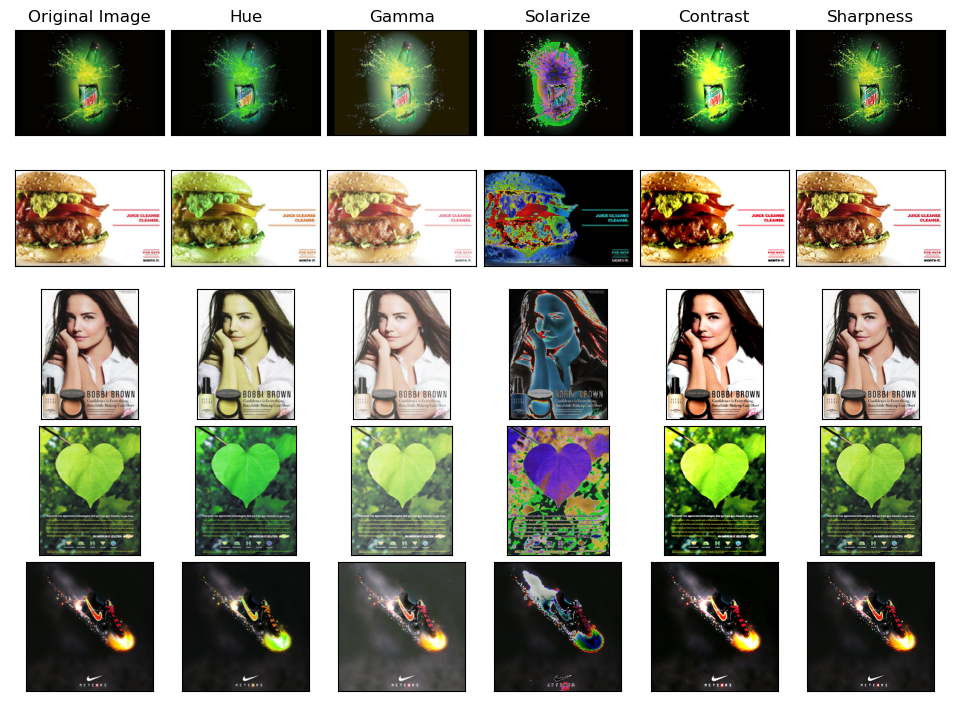

In [17]:
grid_row = 5
grid_column = 6

fig = plt.figure(figsize=(12, 8.75))
# gs = fig.add_gridspec(2, 6, hspace=0.01, wspace=0.01)
# (ax1,ax2,ax3,ax4,ax5,ax6), (ax7, ax8, ax9, ax10, ax11, ax12) = gs.subplots(sharey='row', sharex='col')

for i, image in enumerate(images, start=1):
        
    ax = fig.add_subplot(grid_row, grid_column, i)
    if(i == 1):
        ax.title.set_text('Original Image')
    if(i == 2):
        ax.title.set_text('Hue')
    if(i == 3):
        ax.title.set_text('Gamma')
    if(i == 4):
        ax.title.set_text('Solarize')
    if(i == 5):
        ax.title.set_text('Contrast')
    if(i == 6):
        ax.title.set_text('Sharpness')

    ax.imshow(image)
    ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])
    # ax.set_xticks([])
    # ax.set_yticks([])
    # ax.set_yticklabels([])
    # ax.set_xticklabels([])

plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.savefig("preprocessing_plots.eps", format="eps", dpi=1200, bbox_inches="tight", transparent=True)
plt.show()